## Mô tả các cột trong bộ dữ liệu:
* Ind_ID: ID của cá nhân (nhận dạng duy nhất).
* Test_date: Ngày xét nghiệm.
* Cough_symptoms: Triệu chứng ho (TRUE/FALSE).
* Fever: Triệu chứng sốt (TRUE/FALSE).
* Sore_throat: Triệu chứng đau họng (TRUE/FALSE).
* Shortness_of_breath: Triệu chứng khó thở (TRUE/FALSE).
* Headache: Triệu chứng đau đầu (TRUE/FALSE).
* Corona: Kết quả xét nghiệm COVID-19 (positive/negative/other).
* Age_60_above: Có trên 60 tuổi hay không (None hoặc TRUE/FALSE).
* Sex: Giới tính (None hoặc giới tính thực tế).
* Known_contact: Liên hệ đã biết với người dương tính (như Abroad, Contact with confirmed).

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek

# Bước 1: Tải dữ liệu
df = pd.read_csv('D:\PYTHON\DAKHMT\SmartClinic\data\corona.csv')
# Loại bỏ các cột không cần thiết
df = df.drop(columns=['Ind_ID', 'Test_date', 'Sex', 'Age_60_above'])

# Xóa các bảng ghi có giá trị NaN
df_cleaned = df.dropna()
# Hiển thị thông tin bảng ghi
df_cleaned.info()
# Tạo một bản sao từ df gốc
df_cleaned1 = df_cleaned.copy()

# Chuyển đổi giá trị True/False thành 1/0 trực tiếp trên bản sao
boolean_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
for col in boolean_columns:
    df_cleaned1[col] = df_cleaned1[col].map({True: 1, False: 0})

# Chuyển đổi giá trị Corona thành số trực tiếp trên bản sao
df_cleaned1['Corona'] = df_cleaned1['Corona'].map({'negative': 1, 'positive': 2, 'other': 0})

# Chuyển đổi Known_contact thành số trực tiếp trên bản sao
df_cleaned1['Known_contact'] = df_cleaned1['Known_contact'].map({'Abroad': 1, 'Contact with confirmed': 2, 'Other': 0})

# Bước 3: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_cleaned1.drop(columns=['Corona'])  # Tính năng đầu vào
y = df_cleaned1['Corona']  # Nhãn đầu ra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo bộ kết hợp SMOTE và Tomek links
smote_tomek = SMOTETomek(random_state=42)

# Áp dụng kết hợp oversampling và undersampling cho tập huấn luyện
X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

# Huấn luyện mô hình với dữ liệu đã xử lý
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)
# class_weights = {0: 1, 1: 1, 2: 5}
# Bước 5: Huấn luyện mô hình
# model = RandomForestClassifier(random_state=42, class_weight='balanced')
# model.fit(X_train, y_train)

# Bước 6: Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Hiển thị kết quả
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Độ chính xác của tập huấn luyện
train_accuracy = model.score(X_train, y_train)
print(f"Độ chính xác của tập huấn luyện: {train_accuracy:.2f}")

# Độ chính xác của tập kiểm tra
test_accuracy = model.score(X_test, y_test)
print(f"Độ chính xác của tập kiểm tra: {test_accuracy:.2f}")

# Khởi tạo dữ liệu để sử dụng mô hình
# Định nghĩa đầu vào
X_train1 = [[0, 0, 0, 0, 0, 0]]  # Dữ liệu đầu vào

# Sử dụng transform thay vì fit_transform
# X_train_scaled1 = scaler.transform(X_train1)  # Áp dụng chuẩn hóa đã học từ dữ liệu huấn luyện

# Dự đoán
y_pred1 = model.predict(X_train1)

# Hiển thị dự đoán
print("Dự đoán cho đầu vào [0, 0, 0, 0, 0, 0]:", y_pred1)


C:\Users\KIKIp\AppData\Local\Temp\ipykernel_26448\3007597312.py:10: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\PYTHON\DAKHMT\SmartClinic\data\corona.csv')


<class 'pandas.core.frame.DataFrame'>
Index: 278594 entries, 0 to 278847
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Cough_symptoms       278594 non-null  object
 1   Fever                278594 non-null  object
 2   Sore_throat          278594 non-null  object
 3   Shortness_of_breath  278594 non-null  object
 4   Headache             278594 non-null  object
 5   Corona               278594 non-null  object
 6   Known_contact        278594 non-null  object
dtypes: object(7)
memory usage: 17.0+ MB


# 1. Phân Tích Dữ Liệu Corona
Trong bài phân tích này, chúng ta sẽ tiến hành phân tích một tập dữ liệu liên quan đến các triệu chứng của bệnh nhân Corona. Chúng ta sẽ thực hiện các bước như tải dữ liệu, làm sạch dữ liệu, khám phá dữ liệu, huấn luyện mô hình và dự đoán.


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


## Bước 1: Tải dữ liệu


In [67]:
# Tải dữ liệu
df = pd.read_csv('D:\\PYTHON\\DAKHMT\\SmartClinic\\data\\corona.csv')

# Hiển thị thông tin tổng quát về dữ liệu
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


C:\Users\KIKIp\AppData\Local\Temp\ipykernel_3796\3479807809.py:2: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\\PYTHON\\DAKHMT\\SmartClinic\\data\\corona.csv')


## Bước 2: Làm sạch dữ liệu
- Loại bỏ các cột không cần thiết
- Xóa các bảng ghi có giá trị NaN
- Chuyển đổi các giá trị Boolean thành 1 và 0


In [68]:
# Loại bỏ các cột không cần thiết
df = df.drop(columns=['Ind_ID', 'Test_date', 'Sex', 'Age_60_above'])

# Xóa các bảng ghi có giá trị NaN
df_cleaned = df.dropna()

# Tạo một bản sao từ df gốc
df_cleaned1 = df_cleaned.copy()

# Chuyển đổi giá trị True/False thành 1/0 trực tiếp trên bản sao
boolean_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
for col in boolean_columns:
    df_cleaned1[col] = df_cleaned1[col].map({True: 1, False: 0})

# Chuyển đổi giá trị Corona thành số trực tiếp trên bản sao
df_cleaned1['Corona'] = df_cleaned1['Corona'].map({'negative': 1, 'positive': 2, 'other': 0})

# Chuyển đổi Known_contact thành số trực tiếp trên bản sao
df_cleaned1['Known_contact'] = df_cleaned1['Known_contact'].map({'Abroad': 1, 'Contact with confirmed': 2, 'Other': 0})

# Hiển thị 5 dòng đầu tiên của dữ liệu đã làm sạch
df_cleaned1.head()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,1,0,1,0,0,1,1
1,0,1,0,0,0,2,1
2,0,1,0,0,0,2,1
3,1,0,0,0,0,1,1
4,1,0,0,0,0,1,2


In [79]:
corona_counts = df_cleaned1['Corona'].value_counts()

# In ra kết quả
print("Số lượng giá trị trong cột 'Corona':")
print(corona_counts)

Số lượng giá trị trong cột 'Corona':
Corona
1    260008
2     14694
0      3892
Name: count, dtype: int64


## Bước 3: Khám phá dữ liệu
- Trực quan hóa mối quan hệ giữa các triệu chứng và tình trạng Corona


c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


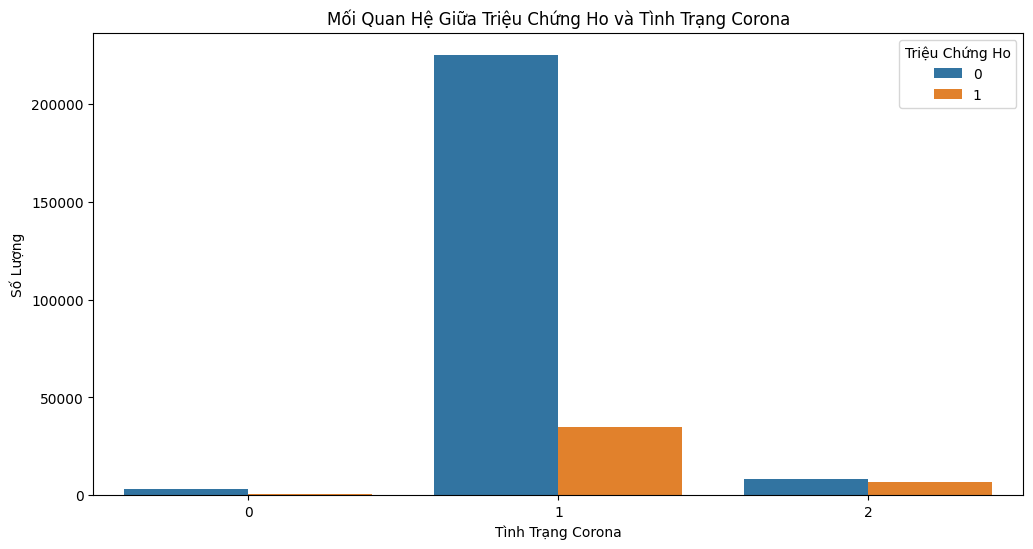

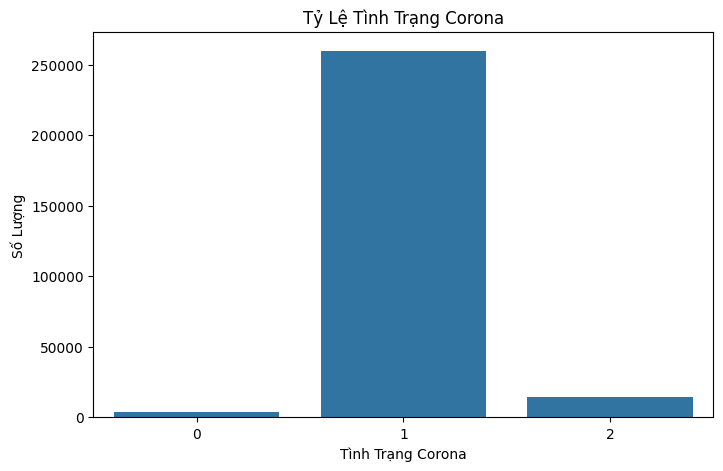

In [77]:
# Trực quan hóa các triệu chứng
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned1, x='Corona', hue='Cough_symptoms')
plt.title('Mối Quan Hệ Giữa Triệu Chứng Ho và Tình Trạng Corona')
plt.xlabel('Tình Trạng Corona')
plt.ylabel('Số Lượng')
plt.legend(title='Triệu Chứng Ho')
plt.show()

# Trực quan hóa tỷ lệ tình trạng Corona
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned1, x='Corona')
plt.title('Tỷ Lệ Tình Trạng Corona')
plt.xlabel('Tình Trạng Corona')
plt.ylabel('Số Lượng')
plt.show()


## Bước 4: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
- Tính năng đầu vào: tất cả các cột ngoại trừ cột 'Corona'
- Nhãn đầu ra: cột 'Corona'


In [70]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_cleaned1.drop(columns=['Corona'])  # Tính năng đầu vào
y = df_cleaned1['Corona']  # Nhãn đầu ra

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Bước 5: Huấn luyện mô hình
- Sử dụng mô hình Random Forest để huấn luyện.


In [71]:
# Huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Bước 6: Dự đoán và đánh giá mô hình
- Dự đoán tình trạng Corona cho tập kiểm tra
- Hiển thị ma trận nhầm lẫn và báo cáo phân loại


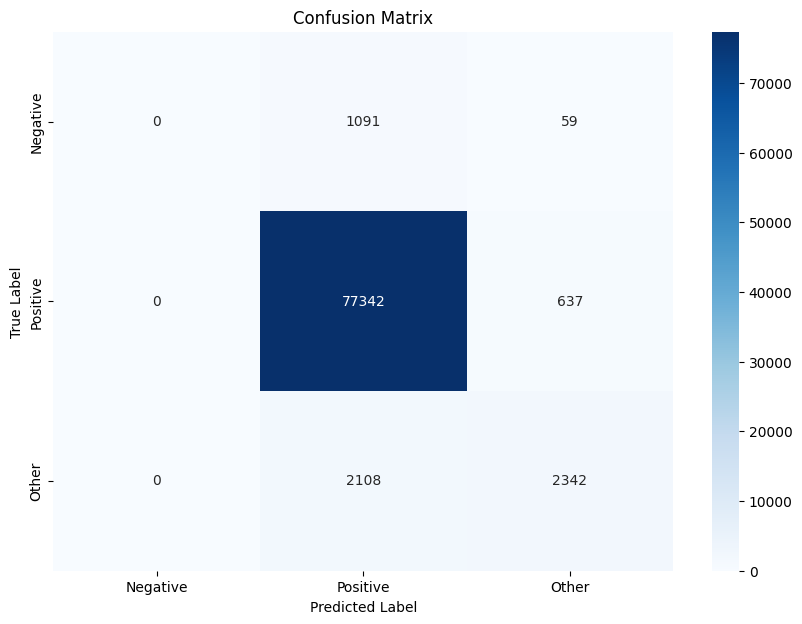

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Dự đoán
y_pred = model.predict(X_test)

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Other'], yticklabels=['Negative', 'Positive', 'Other'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Bước 7: Đánh giá độ chính xác của mô hình


In [83]:
# Độ chính xác của tập huấn luyện
train_accuracy = model.score(X_train, y_train)
print(f"Độ chính xác của tập huấn luyện: {train_accuracy:.2f}")

# Độ chính xác của tập kiểm tra
test_accuracy = model.score(X_test, y_test)
print(f"Độ chính xác của tập kiểm tra: {test_accuracy:.2f}")


Độ chính xác của tập huấn luyện: 0.95
Độ chính xác của tập kiểm tra: 0.95


In [84]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Hiển thị báo cáo phân loại
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Tính và in ra AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Chỉ số cho lớp positive
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.2f}")

Confusion Matrix:
[[    0  1091    59]
 [    0 77342   637]
 [    0  2108  2342]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1150
           1       0.96      0.99      0.98     77979
           2       0.77      0.53      0.63      4450

    accuracy                           0.95     83579
   macro avg       0.58      0.51      0.53     83579
weighted avg       0.94      0.95      0.94     83579



c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

ValueError: multi_class must be in ('ovo', 'ovr')

## Bước 8: Dự đoán với dữ liệu mới


In [74]:
# Khởi tạo dữ liệu để sử dụng mô hình
# Định nghĩa đầu vào
X_new = [[0, 0, 0, 0, 0, 0]]  # Dữ liệu đầu vào

# Dự đoán
y_pred_new = model.predict(X_new)

# Hiển thị dự đoán
print("Dự đoán cho đầu vào [0, 0, 0, 0, 0, 0]:", y_pred_new)


Dự đoán cho đầu vào [0, 0, 0, 0, 0, 0]: [1]


c:\Users\KIKIp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Kết Luận
Trong bài phân tích này, chúng ta đã tải và làm sạch dữ liệu, thực hiện phân tích và trực quan hóa, xây dựng và đánh giá mô hình dự đoán cho tình trạng Corona. Mô hình Random Forest đã cho kết quả khá tốt với độ chính xác trên tập kiểm tra. Chúng ta có thể mở rộng và cải thiện mô hình bằng cách thử nghiệm các thuật toán khác hoặc tối ưu hóa các tham số.
